In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("updatedData.csv")
data.head(2)

,Unnamed: 0.1,Unnamed: 0,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,...,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,genders
0,0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,male
1,1,1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,male


In [13]:
fightingStaces = data["r_stance"].unique()
fightingStaces = [x for x in fightingStaces if str(x) != 'nan']
print(fightingStaces)
# print(len(fightingStances))


['Orthodox', 'Southpaw', 'Switch', 'Open Stance', 'Sideways']


In [14]:
style_counts = data['b_stance'].value_counts().to_frame(name='count')

# add a column with the ratio of each fighting style
style_counts['ratio'] = style_counts['count'] / style_counts['count'].sum()

print(style_counts)

             count     ratio
Orthodox      4530  0.761857
Southpaw      1165  0.195930
Switch         238  0.040027
Open Stance      9  0.001514
Sideways         4  0.000673


<Figure size 500x500 with 0 Axes>

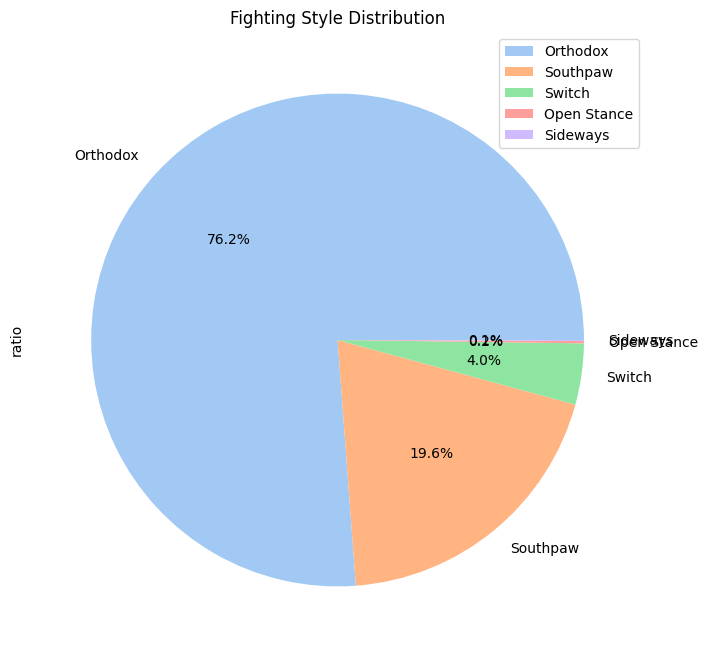

In [21]:
sns.set_palette("pastel")
plt.figure(figsize=(5,5))
style_counts.plot.pie(y='ratio', figsize=(8, 8), autopct='%1.1f%%')
# plt.pie(genderCounts, labels=["Male", "Female"], autopct='%1.1f%%')
# add a title to the chart
plt.title('Fighting Style Distribution')

# display the chart
plt.show()

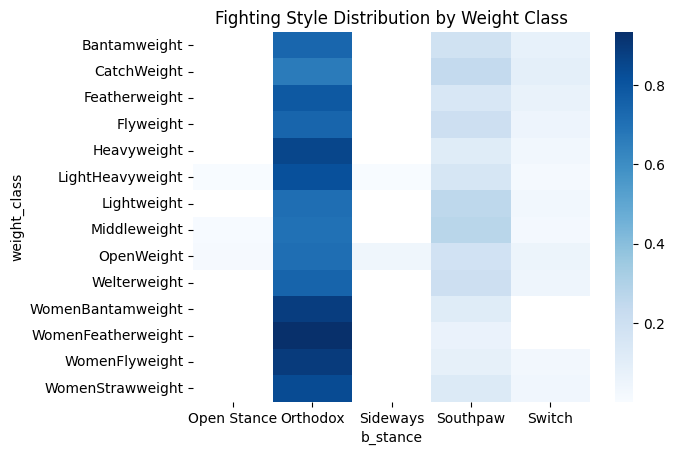

In [26]:
style_counts = data.groupby(['weight_class', 'b_stance'])['b_stance'].count().unstack()

# normalize the data to get the percentage of each fighting style in each weight class
style_counts = style_counts.div(style_counts.sum(axis=1), axis=0)

# plot a heatmap of the fighting style distribution
sns.heatmap(style_counts, cmap="Blues")

# add a title to the chart
plt.title('Fighting Style Distribution by Weight Class')

# display the chart
plt.show()

In [28]:
# create a pivot table with the number of wins for each fighting style against each other
win_table = pd.pivot_table(data=data, index='b_stance', columns='r_stance', values='winner', aggfunc=lambda x: sum(x == 'Blue'))

# fill NaN values with 0 (i.e. if two fighting styles never fought against each other)
win_table.fillna(0, inplace=True)

# create a new DataFrame with the win ratios for each fighting style against each other
ratio_table = win_table.div(win_table.sum(axis=1), axis=0)

# display the win ratios for each fighting style against each other
print(ratio_table)

r_stance     Open Stance  Orthodox  Sideways  Southpaw    Switch
b_stance                                                        
Open Stance     0.000000  0.000000       0.0  1.000000  0.000000
Orthodox        0.002111  0.776918       0.0  0.190711  0.030260
Sideways             NaN       NaN       NaN       NaN       NaN
Southpaw        0.000000  0.761421       0.0  0.205584  0.032995
Switch          0.000000  0.788889       0.0  0.166667  0.044444


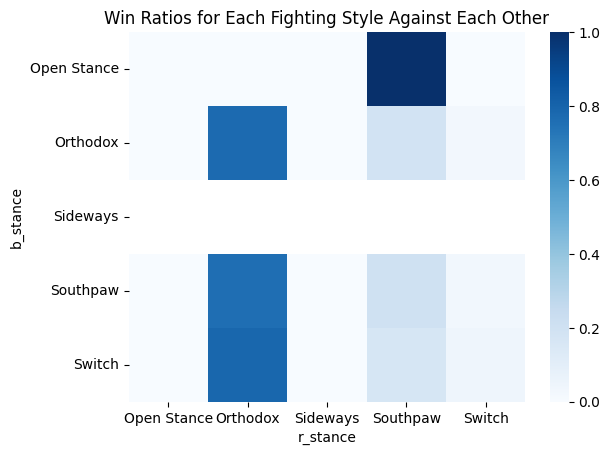

In [29]:
# plot the win ratios as a heatmap
sns.heatmap(ratio_table, cmap='Blues')

# add a title to the chart
plt.title('Win Ratios for Each Fighting Style Against Each Other')

# display the chart
plt.show()

In [30]:
dataMale = data[data["genders"] == "male"]
dataFemale = data[data["genders"] == "female"]
dataMale.reset_index(drop=True, inplace=True)
dataFemale.reset_index(drop=True, inplace=True)

For males

In [32]:
style_counts = dataMale['b_stance'].value_counts().to_frame(name='count')

# add a column with the ratio of each fighting style
style_counts['ratio'] = style_counts['count'] / style_counts['count'].sum()

print(style_counts)

             count     ratio
Orthodox      4106  0.754225
Southpaw      1100  0.202057
Switch         225  0.041330
Open Stance      9  0.001653
Sideways         4  0.000735


<Figure size 500x500 with 0 Axes>

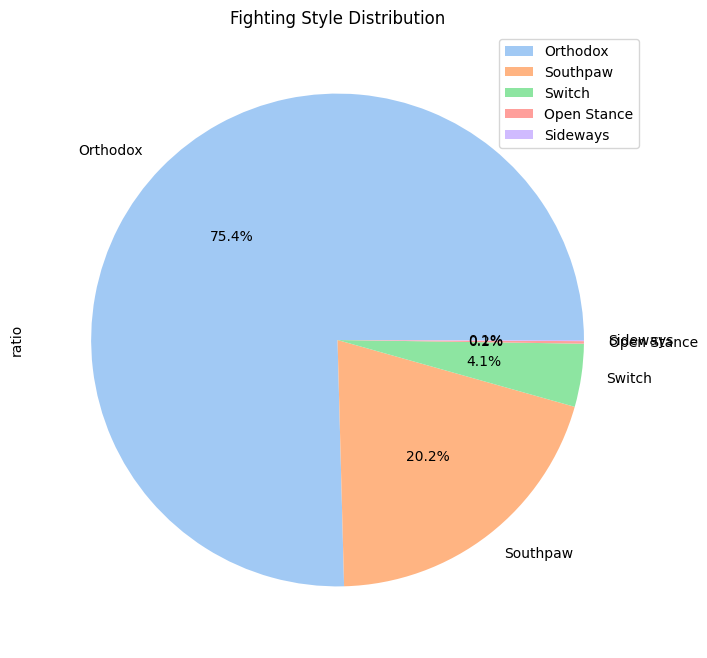

In [33]:
sns.set_palette("pastel")
plt.figure(figsize=(5,5))
style_counts.plot.pie(y='ratio', figsize=(8, 8), autopct='%1.1f%%')
# plt.pie(genderCounts, labels=["Male", "Female"], autopct='%1.1f%%')
# add a title to the chart
plt.title('Fighting Style Distribution')
# display the chart
plt.show()

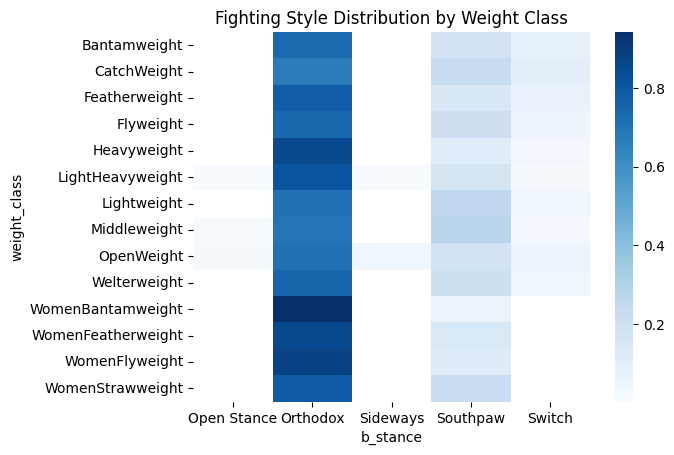

In [35]:
style_counts = dataMale.groupby(['weight_class', 'b_stance'])['b_stance'].count().unstack()

# normalize the data to get the percentage of each fighting style in each weight class
style_counts = style_counts.div(style_counts.sum(axis=1), axis=0)

# plot a heatmap of the fighting style distribution
sns.heatmap(style_counts, cmap="Blues")

# add a title to the chart
plt.title('Fighting Style Distribution by Weight Class')

# display the chart
plt.show()

r_stance     Open Stance  Orthodox  Sideways  Southpaw    Switch
b_stance                                                        
Open Stance     0.000000  0.000000       0.0  1.000000  0.000000
Orthodox        0.002111  0.776918       0.0  0.190711  0.030260
Sideways             NaN       NaN       NaN       NaN       NaN
Southpaw        0.000000  0.761421       0.0  0.205584  0.032995
Switch          0.000000  0.788889       0.0  0.166667  0.044444


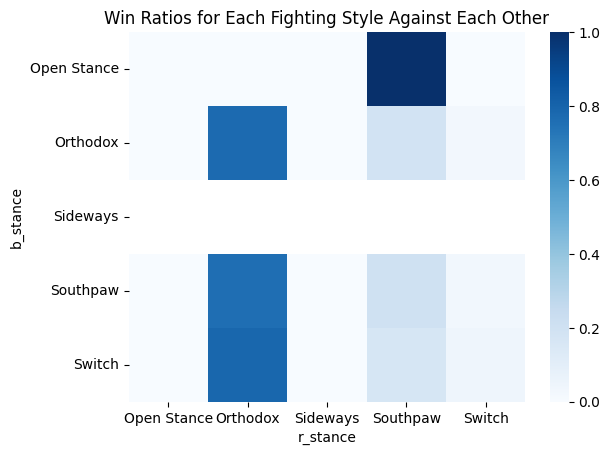

In [37]:
# create a pivot table with the number of wins for each fighting style against each other
win_table = pd.pivot_table(data=data, index='b_stance', columns='r_stance', values='winner', aggfunc=lambda x: sum(x == 'Blue'))

# fill NaN values with 0 (i.e. if two fighting styles never fought against each other)
win_table.fillna(0, inplace=True)

# create a new DataFrame with the win ratios for each fighting style against each other
ratio_table = win_table.div(win_table.sum(axis=1), axis=0)

# display the win ratios for each fighting style against each other
print(ratio_table)

# plot the win ratios as a heatmap
sns.heatmap(ratio_table, cmap='Blues')

# add a title to the chart
plt.title('Win Ratios for Each Fighting Style Against Each Other')

# display the chart
plt.show()